# Notebook for Training with Faster RCNN

We'll import code from the scripts folder so we don't have to clutter this notebook

In [7]:
%matplotlib inline

import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import sys
import torch
import torchvision

from albumentations import OneOf

sys.path.append(os.path.join('..', 'scripts'))
from models import WheatModel
from evaluation import calculate_image_precision

sns.set()

%load_ext autoreload
%autoreload

ALLOW_AUTOMATIC_SHUTDOWN = True  # allow the script to automatically shutdown your computer after use.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\Alan\Anaconda3\envs\wheat-detection\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


Iteration #50 loss: 0.909771203994751
Iteration #100 loss: 0.7972390651702881
Iteration #150 loss: 0.7985334992408752
Iteration #200 loss: 0.7195625305175781
Iteration #250 loss: 0.5377445816993713
Iteration #300 loss: 0.8066378235816956
Iteration #350 loss: 0.6029609441757202
Iteration #400 loss: 0.5698313117027283
Iteration #450 loss: 0.6832548379898071
Iteration #500 loss: 0.6105546951293945
Iteration #550 loss: 0.7312495708465576
Iteration #600 loss: 0.6242011189460754
Iteration #650 loss: 0.47101327776908875
Iteration #700 loss: 0.6669807434082031
Iteration #750 loss: 0.6125825047492981
Iteration #800 loss: 0.3861018121242523
Epoch #0 loss: 0.7368710932997166
Iteration #850 loss: 0.6440181732177734
Iteration #900 loss: 0.6562029123306274
Iteration #950 loss: 0.6217660903930664
Iteration #1000 loss: 0.6610784530639648
Iteration #1050 loss: 0.6670019626617432
Iteration #1100 loss: 0.6393394470214844
Iteration #1150 loss: 0.7728051543235779
Iteration #1200 loss: 0.5695871710777283
It

Iteration #9650 loss: 0.540890097618103
Iteration #9700 loss: 0.4433518648147583
Iteration #9750 loss: 0.49927231669425964
Iteration #9800 loss: 0.6246715188026428
Iteration #9850 loss: 0.44363078474998474
Iteration #9900 loss: 0.5864185094833374
Iteration #9950 loss: 0.42582470178604126
Iteration #10000 loss: 0.6197328567504883
Iteration #10050 loss: 0.6154792308807373
Iteration #10100 loss: 0.5767134428024292
Epoch #11 loss: 0.5519197428184098
Iteration #10150 loss: 0.42645126581192017
Iteration #10200 loss: 0.6233175992965698
Iteration #10250 loss: 0.49944886565208435
Iteration #10300 loss: 0.6398890018463135
Iteration #10350 loss: 0.5536094307899475
Iteration #10400 loss: 0.6417503952980042
Iteration #10450 loss: 0.48581528663635254
Iteration #10500 loss: 0.5339736938476562
Iteration #10550 loss: 0.5314921736717224
Iteration #10600 loss: 0.7623192667961121
Iteration #10650 loss: 0.5675492882728577
Iteration #10700 loss: 0.6064255237579346
Iteration #10750 loss: 0.46319079399108887


Iteration #18950 loss: 0.6045185923576355
Iteration #19000 loss: 0.6452828049659729
Iteration #19050 loss: 0.48237499594688416
Iteration #19100 loss: 0.5501914620399475
Iteration #19150 loss: 0.47969335317611694
Iteration #19200 loss: 0.667371928691864
Iteration #19250 loss: 0.4916711449623108
Iteration #19300 loss: 0.5668830871582031
Iteration #19350 loss: 0.47389987111091614
Iteration #19400 loss: 0.4281192719936371
Epoch #22 loss: 0.5244351933352756
Iteration #19450 loss: 0.4801451861858368
Iteration #19500 loss: 0.6720253229141235
Iteration #19550 loss: 0.4523991346359253
Iteration #19600 loss: 0.5261005759239197
Iteration #19650 loss: 0.4965122640132904
Iteration #19700 loss: 0.5745725631713867
Iteration #19750 loss: 0.46625351905822754
Iteration #19800 loss: 0.5278121829032898
Iteration #19850 loss: 0.5791181325912476
Iteration #19900 loss: 0.409457266330719
Iteration #19950 loss: 0.4435129165649414
Iteration #20000 loss: 0.41636645793914795
Iteration #20050 loss: 0.4893074035644

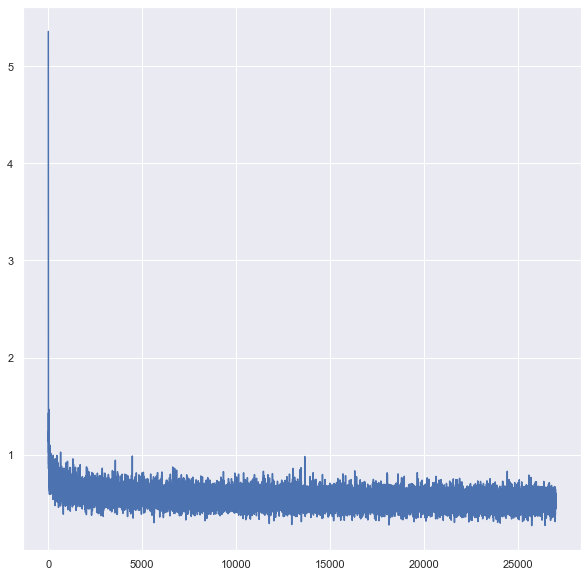

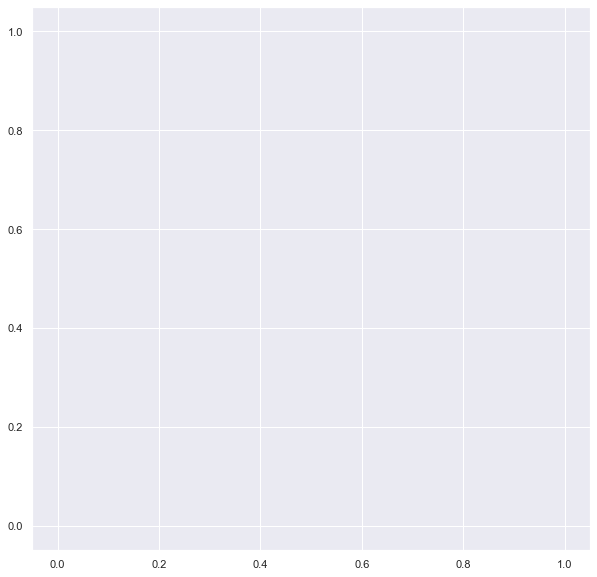

In [8]:
%%time
base_path = os.path.join('..', 'data')

model = WheatModel(
    base_path=base_path,
    num_epochs=32,
    train_val_split=1,
#     transforms=[A.Flip(0.5), 
#                 OneOf([
#                     A.RandomBrightnessContrast(), 
#                     A.HueSaturationValue()
#                 ], p=0.5),
#                 OneOf([
#                     A.MotionBlur()
#                 ])
#                ]
    transforms=[]
)
loss, precisions = model.main()
plt.figure(figsize=(10, 10))
plt.plot(loss)
plt.figure(figsize=(10, 10))
plt.plot(precisions)
model.save_params()

# Validation

In [2]:
base_path = os.path.join('..', 'data')

model = WheatModel(
    base_path=base_path,
    num_epochs=1,
    train_val_split=0.8,
    weights_file='faster_rcnn_resnet50_fpn_10epochs.pth'
)

In [6]:
# Our testing sample
sample_id = '1ef16dab1'

gt_boxes = model.train_df[model.train_df['image_id'] == sample_id][['x', 'y', 'w', 'h']].values
gt_boxes = gt_boxes.astype(np.int)

# Ground-truth boxes of our sample
gt_boxes

array([[954, 391,  70,  90],
       [660, 220,  95, 102],
       [ 64, 209,  76,  57],
       [896,  99, 102,  69],
       [747, 460,  72,  77],
       [885, 163, 103,  69],
       [514, 399,  90,  97],
       [702, 794,  97,  99],
       [721, 624,  98, 108],
       [826, 512,  82,  94],
       [883, 944,  79,  74],
       [247, 594, 123,  92],
       [673, 514,  95, 113],
       [829, 847, 102, 110],
       [ 94, 737,  92, 107],
       [588, 568,  75, 107],
       [158, 890, 103,  64],
       [744, 906,  75,  79],
       [826,  33,  72,  74],
       [601,  69,  67,  87]])

In [7]:
def format_prediction_string(boxes, scores):
    pred_strings = []
    for j in zip(scores, boxes):
        pred_strings.append("{0:.4f} {1} {2} {3} {4}".format(j[0], j[1][0], j[1][1], j[1][2], j[1][3]))

    return " ".join(pred_strings)

In [43]:
precisions = []
model.model.eval()
for images, targets, image_ids in model.valid_data_loader:
    images = list(image.to(model.device) for image in images)
    outputs = model.model.forward(images)
    
    for i, image in enumerate(images):
        boxes = outputs[i]['boxes'].data.cpu().numpy()
        scores = outputs[i]['scores'].data.cpu().numpy()

        boxes = boxes[scores >= detection_threshold].astype(np.int32)
        scores = scores[scores >= detection_threshold]
        image_id = image_ids[i]

        boxes[:, 2] = boxes[:, 2] - boxes[:, 0]
        boxes[:, 3] = boxes[:, 3] - boxes[:, 1]

        gt_boxes = model.val_df[model.val_df['image_id'] == image_ids[i]][['x', 'y', 'w', 'h']].values
        image_precision = calculate_image_precision(gt_boxes, boxes)
        precisions.append(image_precision)

print(np.mean(precisions))

('31a6e55f2', 'fd5624913', 'b13f38e6f', '48c72c991')
('42e247347', '556c18af4', '14fd84198', 'c682d8c66')
('4aeb37788', 'e46378032', '798a261f0', '999d9d27d')
('d13e3ffce', '8b558e9e3', '005b0d8bb', 'e99cca2a3')
('4c7fc04f6', '372d12c55', '43e3ccd92', '4e5c1078d')
('69fc3d3ff', 'c6b4933f7', '1bda74f14', '92c92d40d')
('895420d9f', 'b815af10b', '5e0a7fb4d', '220488d01')
('41c0123cc', '8d6bb70e5', 'c86621747', 'c73f0a714')
('33d37a437', 'c3c03e0b7', '7b72ea0fb', '480c01244')
('afb7671e5', '029c79463', 'f251e40f2', '5738fcf14')
('4a3f67d2e', '49dcb7dd3', '4d90cdad1', '29e44e305')
('4c02b2f7f', '83a5d8ac8', '2ccec6dcc', '863e0253e')
('d7d200c0b', 'f5093f57d', 'ca4cb597b', 'b6ab77fd7')
('a22cdd5eb', '91c9d9c38', '43a765c3e', 'b53afdf5c')
('3e1e66c76', '71fd03d51', 'cc9092474', '0435654cd')
('01f37f1d3', '43650fd9c', '695ae4a12', 'b7c97a57b')
('826d92f06', '531acb360', '02b6f199c')
0.7661366651953706


In [5]:
model.model.eval()
detection_threshold = 0.5
results = []

for images, targets, image_ids in model.valid_data_loader:

    images = list(image.to(model.device) for image in images)
    outputs = model.model(images)

    for i, image in enumerate(images):

        boxes = outputs[i]['boxes'].data.cpu().numpy()
        scores = outputs[i]['scores'].data.cpu().numpy()
        
        boxes = boxes[scores >= detection_threshold].astype(np.int32)
        scores = scores[scores >= detection_threshold]
        image_id = image_ids[i]
        
        boxes[:, 2] = boxes[:, 2] - boxes[:, 0]
        boxes[:, 3] = boxes[:, 3] - boxes[:, 1]
        
        result = {
            'image_id': image_id,
            'PredictionString': format_prediction_string(boxes, scores)
        }

        
        results.append(result)

C:\Users\Alan\Anaconda3\envs\wheat-detection\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
..\torch\csrc\utils\python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


In [3]:
# ###################################################################################################################
# #################### WARNING THIS WILL SHUT DOWN THE COMPUTER IF IT IS UNCOMMENTED ################################
# ###################################################################################################################
# if ALLOW_AUTOMATIC_SHUTDOWN:
#     os.system('shutdown -s -t 0')
# ###################################################################################################################
# #################### WARNING THIS WILL SHUT DOWN THE COMPUTER IF IT IS UNCOMMENTED ################################
# ###################################################################################################################